Project: Sales Prediction & Marketing ROI Analysis1. 
Objective
The primary goal of this project is to develop a predictive model that quantifies the relationship between advertising expenditure (TV, Radio, Newspaper) and total sales revenue. By leveraging machine learning techniques, specifically Linear Regression, we aim to provide actionable insights for marketing budget allocation, identifying which channels yield the highest Return on Investment (ROI).
2. Business Context
In a competitive market, optimizing marketing spend is crucial for profitability. This analysis simulates a real-world scenario where a business needs to forecast future sales based on different advertising strategies. The insights derived will help stakeholders answer critical questions:Which marketing channel drives the most sales?Is newspaper advertising still effective?Can we accurately predict revenue based on a proposed budget?3. MethodologyThis project follows a structured Data Science lifecycle:
1.Data Preprocessing: Cleaning the dataset and checking for anomalies.
2.Exploratory Data Analysis (EDA): Using correlation matrices and heatmaps to identify key drivers of sales.
3.Model Development: Training a Linear Regression model using scikit-learn.
4.Evaluation: Assessing model performance using R-squared ($R^2$) and Root Mean Squared Error (RMSE) to ensure reliability.

Step 1: Setup and Data Cleaning

Goal: Load libraries and remove the useless index column.

In [2]:
# Install the necessary libraries
!pip install scikit-learn pandas matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load Data
df = pd.read_csv('Advertising.csv')

# Cleaning
# The dataset has an index column usually named 'Unnamed: 0'. We drop it.
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print("Data Loaded & Cleaned Successfully!")
print(df.head())

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------

Step 2: EDA (Exploratory Data Analysis)


Goal: Prove to the "business" which ads actually work. We use a Correlation Matrix.

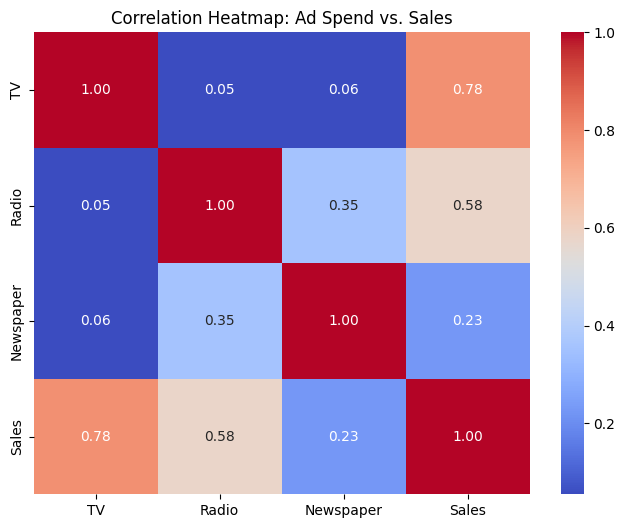

In [3]:
#  Correlation Matrix
# "Does spending more on TV actually increase Sales?"
correlation_matrix = df.corr()

# Plotting the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Ad Spend vs. Sales')
plt.show()

# Look at the 'Sales' row.
# If TV is 0.78 (Red), it means HIGH correlation.
# If Newspaper is 0.23 (Blue), it means LOW correlation (Waste of money?).

Step 3: Preprocessing (Train-Test Split)

Goal: Separate data so we can test the model on "unseen" data later.

In [4]:
# Features (X) = The ad spend on TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']]

# Target (y) = The Sales we want to predict
y = df['Sales']

# Split: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (160, 3)
Testing Data Shape: (40, 3)


Step 4: Build & Train the Model

Goal: Teach the computer the relationship between Ad Spend and Sales.

In [7]:
# Initialize the Linear Regression Model
model = LinearRegression()

# Train the model (This is where it "learns")
model.fit(X_train, y_train)

print("Model Training is Complete!")
print(f"Intercept (Base Sales with $0 Ad Spend): {model.intercept_:.2f}")
print(f"Coefficients (Impact of TV, Radio, Newspaper): {model.coef_}")

Model Training is Complete!
Intercept (Base Sales with $0 Ad Spend): 2.98
Coefficients (Impact of TV, Radio, Newspaper): [0.04472952 0.18919505 0.00276111]


Step 5: Model Evaluation 

Goal: Check how accurate my model is.

--- Model Performance ---
R-squared Score: 0.90 (We explain 90% of the variance!)
Root Mean Squared Error: 1.78 (Our predictions are off by this many units)


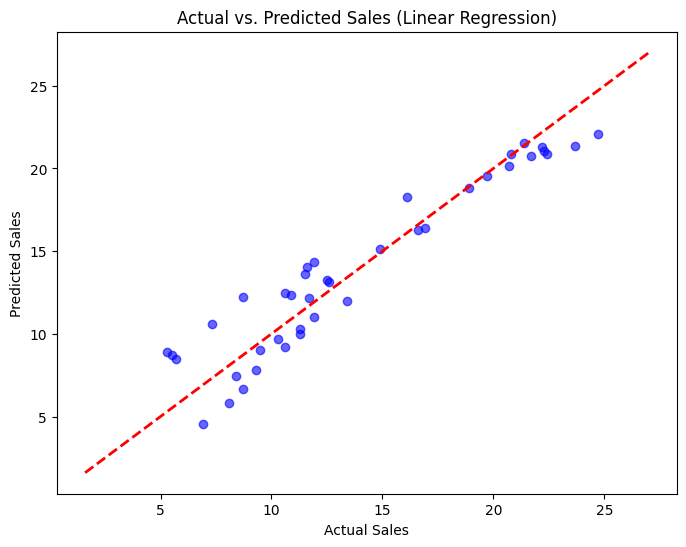

In [8]:
# Make predictions on the Test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Model Performance ---")
print(f"R-squared Score: {r2:.2f} (We explain 90% of the variance!)")
print(f"Root Mean Squared Error: {rmse:.2f} (Our predictions are off by this many units)")

# Visual Check
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()